<a href="https://colab.research.google.com/github/LeonardoNerydeSouza/Deep-Learning-/blob/master/P1T6_%C3%A1rbol_regresi%C3%B3n_insurance_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Insurance costs**

##Árbol de decisión para regresión

###Importar librerías

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #clase para implmentar árbol de regresión
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

###Cargar Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Deep learning/datasets_13720_18513_insurance.csv', encoding='utf-8')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Nuestro objetivo será la columna "Charges" 

In [ ]:
df.shape

(1338, 7)

###Tomamos los datos a analizar y se convierten a formato numérico

In [ ]:
from sklearn import preprocessing 
le =preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


###Conociendo los datos

In [ ]:
#df.describe()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###Graficando los datos

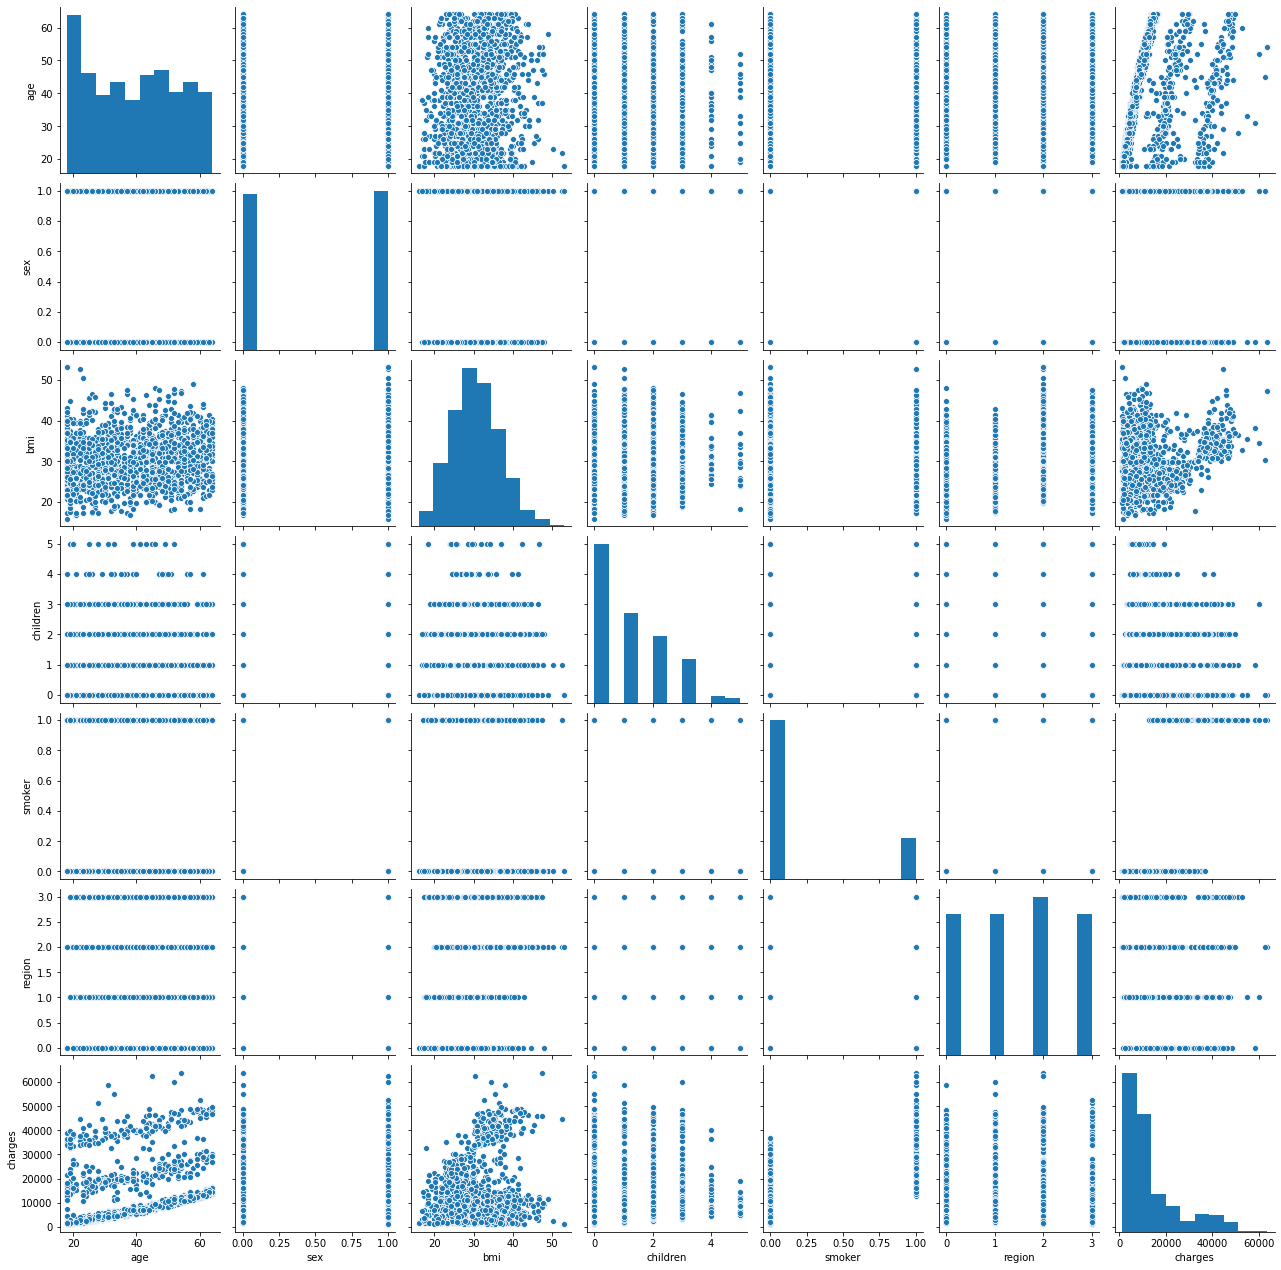

In [ ]:
sns.pairplot(df)

###Separar datos en X y Y

In [ ]:
Y= df['charges']
X = df.drop(['charges'],axis=1)

###Separamos TRAIN y TEST

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

###Creamos la instancia y entrenamos el modelo

In [ ]:
arbol_regre=DecisionTreeRegressor()
arbol_regre.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

###Predicciones

In [ ]:
y_train_predi=arbol_regre.predict(X_train)
y_test_predi= arbol_regre.predict(X_test)
#print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
#print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
print("Accuracy Global %"+ str(arbol_regre.score(X_test,Y_test)))

Accuracy Global %0.7421637350156113


###Graficando resultado

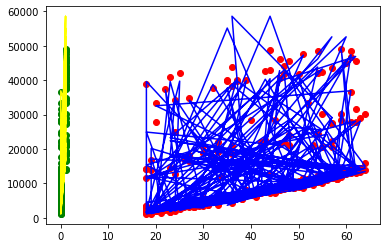

In [ ]:
plt.scatter(X_test.age,Y_test, color='red')
plt.scatter(X_test.smoker,Y_test, color='green')
plt.plot(X_test.age,arbol_regre.predict(X_test),color= 'blue')
plt.plot(X_test.smoker,arbol_regre.predict(X_test),color= 'yellow')
plt.show()

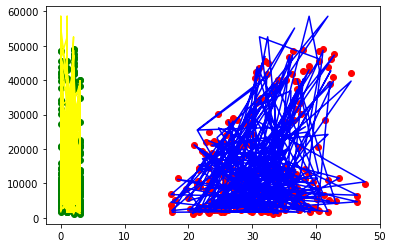

In [ ]:
plt.scatter(X_test.bmi,Y_test, color='red')
plt.scatter(X_test.region,Y_test, color='green')
plt.plot(X_test.bmi,arbol_regre.predict(X_test),color= 'blue')
plt.plot(X_test.region,arbol_regre.predict(X_test),color= 'yellow')
plt.show()

##Regresión lineal

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, Y, test_size=0.2)
print("TRAIN--> X: {} - Y: {}".format(X_train_lin.shape,y_train_lin.shape))
print("TEST--> X: {} - Y: {}".format(X_test_lin.shape,y_test_lin.shape))

TRAIN--> X: (1070, 6) - Y: (1070,)
TEST--> X: (268, 6) - Y: (268,)


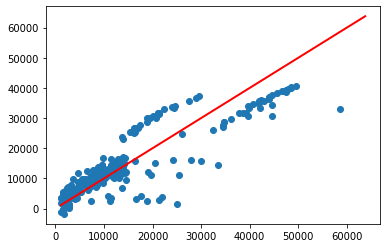

Precisión del modelo: 0.7879035176690401


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#entrenamos
regressor.fit(X_train_lin, y_train_lin)
#predecimos
pred = regressor.predict(X_test_lin)

#visualizar la predicción en los datos de testeo
plt.scatter(y_test_lin, pred)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], c='r', lw=2)
plt.show()
print("Precisión del modelo: "+str(regressor.score(X_test_lin, y_test_lin)))